In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-51.2963095225645 -62.066668746750196
-79.06452171242901 -126.11880926111293
-34.28415123631687 103.3036041833077
-83.50730052832094 11.350778066593335
-76.73131292722907 -35.965382836288796
-39.777288900199416 -33.96298923376244
-27.381013726539486 -71.83726748512905
-10.409996455317966 -79.01813344526104
34.58580715920854 5.614256279080081
23.832650394954143 114.6205983987802
-4.790037246678025 95.60143769424599
27.2040758336764 82.23570641758329
24.520399448804838 -8.957752746616336
67.08650412720132 -150.97035906138922
35.44203343137896 129.0853658959639
-3.0707306117936497 -140.63222631042987
-78.11226088502032 -25.74503144199312
-75.01131754449311 -85.48626697938808
-47.76977245067921 -119.08963017687168
39.66102609436814 135.44965160953848
-65.36643308377467 -118.55023213133106
-68.29413618319532 -97.47732932814242
-69.26510383797016 83.83213217591265
-28.745475990160593 20.587778407139808
6.748531571838257 143.01421817655785
-6.513708420839492 155.44541826358642
-87.61920094519

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [10]:
#Import the requests library
import requests

#Import  the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | copiapo
Processing Record 7 of Set 1 | huarmey
Processing Record 8 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 9 of Set 1 | yuancheng
Processing Record 10 of Set 1 | padang
Processing Record 11 of Set 1 | mankapur
Processing Record 12 of Set 1 | tiznit
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | hirado
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | wajima
Processing Record 18 of Set 1 | upington
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | panguna
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | cidreira
Processing Record 23 of Set 1 | bethe

Processing Record 10 of Set 4 | mahajanga
Processing Record 11 of Set 4 | namatanai
Processing Record 12 of Set 4 | dingli
Processing Record 13 of Set 4 | pevek
Processing Record 14 of Set 4 | bredasdorp
Processing Record 15 of Set 4 | port moresby
Processing Record 16 of Set 4 | san luis
Processing Record 17 of Set 4 | severo-kurilsk
Processing Record 18 of Set 4 | tuatapere
Processing Record 19 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 4 | karaul
City not found. Skipping...
Processing Record 21 of Set 4 | mahebourg
Processing Record 22 of Set 4 | acarau
Processing Record 23 of Set 4 | nemuro
Processing Record 24 of Set 4 | florida
Processing Record 25 of Set 4 | pedernales
Processing Record 26 of Set 4 | yuryuzan
Processing Record 27 of Set 4 | along
Processing Record 28 of Set 4 | montauban
Processing Record 29 of Set 4 | bahia blanca
Processing Record 30 of Set 4 | niquelandia
Processing Record 31 of Set 4 | butaritari
Processing Record 32 of Set 4 

Processing Record 49 of Set 7 | ahmadnagar
Processing Record 50 of Set 7 | gizo
Processing Record 1 of Set 8 | springbok
Processing Record 2 of Set 8 | goderich
Processing Record 3 of Set 8 | el monte
Processing Record 4 of Set 8 | chokurdakh
Processing Record 5 of Set 8 | muborak
Processing Record 6 of Set 8 | san carlos de bariloche
Processing Record 7 of Set 8 | norman wells
Processing Record 8 of Set 8 | esperance
Processing Record 9 of Set 8 | zhezkazgan
Processing Record 10 of Set 8 | luziania
Processing Record 11 of Set 8 | anchorage
Processing Record 12 of Set 8 | eureka
Processing Record 13 of Set 8 | heihe
Processing Record 14 of Set 8 | san andres
Processing Record 15 of Set 8 | orebro
Processing Record 16 of Set 8 | solnechnyy
Processing Record 17 of Set 8 | khandyga
Processing Record 18 of Set 8 | kherson
Processing Record 19 of Set 8 | ulladulla
Processing Record 20 of Set 8 | salalah
Processing Record 21 of Set 8 | forestville
Processing Record 22 of Set 8 | nanortalik
P

Processing Record 38 of Set 11 | sinnamary
Processing Record 39 of Set 11 | powell
Processing Record 40 of Set 11 | tecoanapa
Processing Record 41 of Set 11 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 11 | sulmona
Processing Record 43 of Set 11 | avigliana
Processing Record 44 of Set 11 | balimo
City not found. Skipping...
Processing Record 45 of Set 11 | creston
Processing Record 46 of Set 11 | ciudad bolivar
Processing Record 47 of Set 11 | kingussie
Processing Record 48 of Set 11 | yomitan
City not found. Skipping...
Processing Record 49 of Set 11 | bafata
Processing Record 50 of Set 11 | mkushi
Processing Record 1 of Set 12 | kerema
Processing Record 2 of Set 12 | salinopolis
Processing Record 3 of Set 12 | agirish
Processing Record 4 of Set 12 | linqiong
Processing Record 5 of Set 12 | farias brito
Processing Record 6 of Set 12 | sao filipe
Processing Record 7 of Set 12 | darhan
Processing Record 8 of Set 12 | chuy
Processing Record 9 of Set 12 | christch

In [14]:
len(city_data)

512

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.26,69,75,12.66,AR,2022-07-10 18:35:49
1,Rikitea,-23.1203,-134.9692,72.54,79,25,6.33,PF,2022-07-10 18:34:34
2,Busselton,-33.6500,115.3333,54.97,65,96,3.04,AU,2022-07-10 18:35:49
3,Hermanus,-34.4187,19.2345,51.80,73,97,3.78,ZA,2022-07-10 18:35:50
4,Laguna,38.4210,-121.4238,91.02,38,0,9.22,US,2022-07-10 18:35:50
5,Copiapo,-27.3667,-70.3333,56.89,31,0,14.16,CL,2022-07-10 18:35:50
6,Huarmey,-10.0681,-78.1522,68.43,71,47,11.12,PE,2022-07-10 18:34:50
7,Yuancheng,36.6520,107.7896,71.64,80,100,6.26,CN,2022-07-10 18:35:51
8,Padang,-0.9492,100.3543,76.30,87,100,3.76,ID,2022-07-10 18:35:51
9,Mankapur,27.0333,82.2333,91.04,52,0,10.98,IN,2022-07-10 18:35:52


In [16]:
#Reorder columns Version1
#new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#city_data_df = city_data_df[new_column_order]

##Reorder columns Version2
city_data_df = city_data_df.reindex(columns=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-07-10 18:35:49,-54.8000,-68.3000,35.26,69,75,12.66
1,Rikitea,PF,2022-07-10 18:34:34,-23.1203,-134.9692,72.54,79,25,6.33
2,Busselton,AU,2022-07-10 18:35:49,-33.6500,115.3333,54.97,65,96,3.04
3,Hermanus,ZA,2022-07-10 18:35:50,-34.4187,19.2345,51.80,73,97,3.78
4,Laguna,US,2022-07-10 18:35:50,38.4210,-121.4238,91.02,38,0,9.22


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

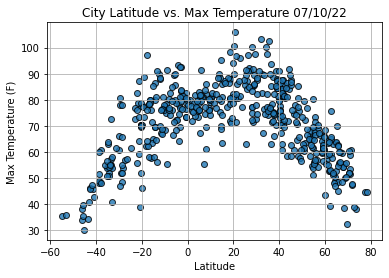

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

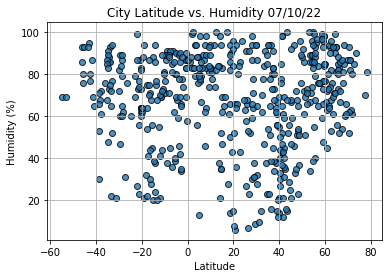

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

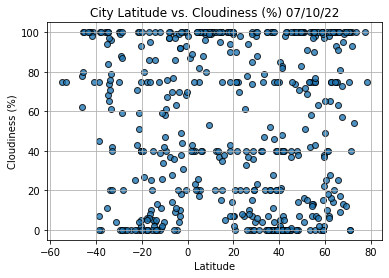

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

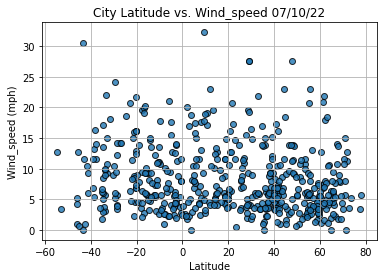

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
#Use the loc method to choose the range(index) 13
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2022-07-10 18:35:53
Lat                          -9.8
Lng                     -139.0333
Max Temp                    77.41
Humidity                       77
Cloudiness                     58
Wind Speed                  17.85
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >=0

0      False
1      False
2      False
3      False
4       True
       ...  
507     True
508     True
509     True
510     True
511    False
Name: Lat, Length: 512, dtype: bool

In [27]:
#Use the loc method to choose the range >=0 - Northen Hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Laguna,US,2022-07-10 18:35:50,38.4210,-121.4238,91.02,38,0,9.22
7,Yuancheng,CN,2022-07-10 18:35:51,36.6520,107.7896,71.64,80,100,6.26
9,Mankapur,IN,2022-07-10 18:35:52,27.0333,82.2333,91.04,52,0,10.98
10,Tiznit,MA,2022-07-10 18:35:52,29.5833,-9.5000,97.59,9,4,4.05
11,College,US,2022-07-10 18:35:52,64.8569,-147.8028,63.59,93,100,0.00


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

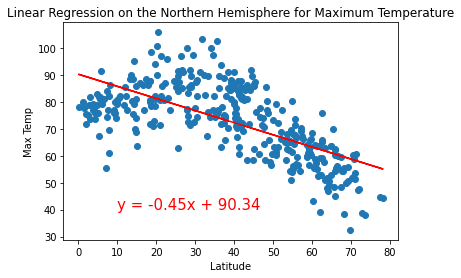

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

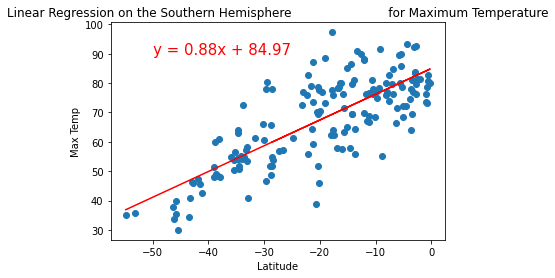

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


In [62]:
#check the r_value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
print(p_value)
print(f"The p-value is: {p_value:,.2f}")# What happened with the result ?

0.7832485583085593
1.1132203957206311e-35
The p-value is: 0.00


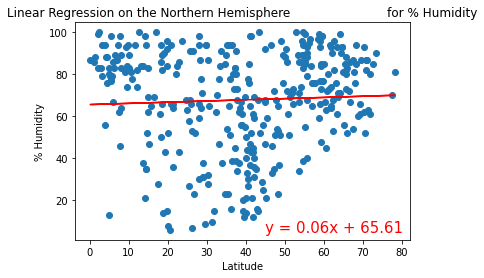

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))


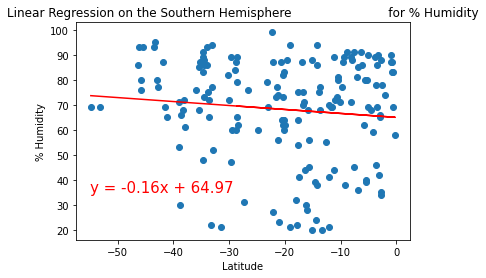

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,35))

In [81]:
#check the r_value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
print(p_value)
print(f"The p-value is: {p_value:,.2f}")# What happened with the result ?

-0.10387742641462336
0.18290623028983852
The p-value is: 0.18


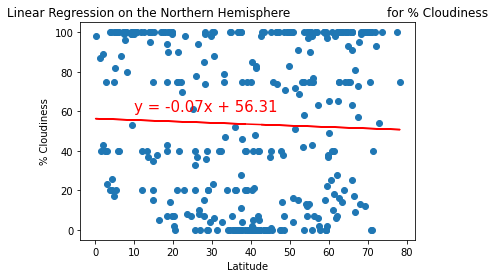

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

In [92]:
#check the r_value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
print(p_value)
print(f"The p-value is: {p_value:,.2f}")# What happened with the result ?

-0.09585233669007706
0.21927065597778286
The p-value is: 0.22


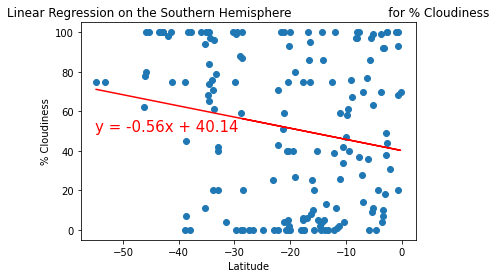

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,50))

In [96]:
#check the r_value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
print(p_value)
print(f"The p-value is: {p_value:,.2f}")# What happened with the result ?

-0.19503165542607456
0.011800727114432839
The p-value is: 0.01


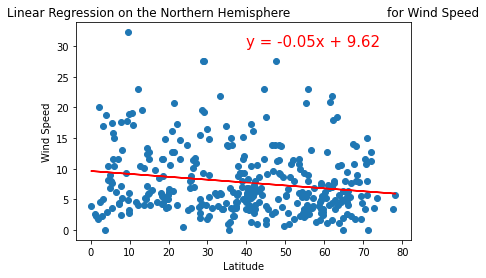

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

In [98]:
#check the r_value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
print(p_value)
print(f"The p-value is: {p_value:,.2f}")# What happened with the result ?

-0.17432380199578143
0.0011305736901204488
The p-value is: 0.00


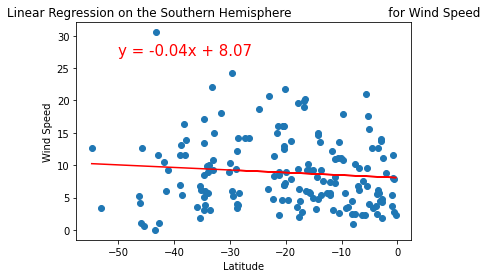

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,27))

In [103]:
#check the r_value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
print(p_value)
print(f"The p-value is: {p_value:,.2f}")# What happened with the result ?

-0.09585233669007706
0.21927065597778286
The p-value is: 0.22
